# HowTo Historical Network Analysis with Python

The following introduction to historical network analysis with Python is based on contents provided by [Demi Vasques](https://github.com/dvasques83) in the context of the [DH Lab at the Leibniz Institute of European History HNR Winter School](https://github.com/ieg-dhr/hnr-winterschool-2022), 28 Nov-1 Dec 2022.

This Jupyter Notebook file exemplifies the practical application of key concepts of HNR in Python. The dataset (not double-checked, potentially messy; see 3.1 below for specific problems in the dataset) has been extracted from a historical source edited in the context of the [Auden Musulin Papers](https://github.com/Auden-Musulin-Papers) digital edition project: it records instances of interaction in British-American poet W. H. Auden's Austrian period 1958-1973 as represented in Stella Musulin's memoir [*The Years in Austria*](https://amp.acdh.oeaw.ac.at/amp-transcript__0062.html).

## 1 First Steps

### 1.1 Import Modules

In [1]:
import json # import json module
import networkx as nx # import NetworkX package
import collections as cl # import collections module
import community as community_louvain # import Community detection for NetworkX; need to pip install python-louvain
import matplotlib.pyplot as plt # import matplotlib.pyplot from Matplotlib library
import pandas as pd # import pandas library

### 1.2 Import Dataset

In [2]:
with open('howto_hnr.json') as f: # open json file with nested `nodes` and `links` objects
    data = json.load(f) # create dictionary from json file with `nodes` and `links` lists

### 1.3 Explore Dataset

In [3]:
print(data) # print dictionary

{'nodes': [{'name': 'Stella Musulin', 'value': 37, 'colour': '#bde0f6'}, {'name': 'W. H. Auden', 'value': 42, 'colour': '#808080'}, {'name': 'Emma Eiermann', 'value': 2, 'colour': '#191970'}, {'name': 'Chester Kallman', 'value': 22, 'colour': '#808080'}, {'name': 'Elsa Musulin', 'value': 4, 'colour': '#808080'}, {'name': 'Christiane Zimmer', 'value': 2, 'colour': '#808080'}, {'name': 'Marko Musulin', 'value': 1, 'colour': '#808080'}, {'name': 'Father Lustkandl', 'value': 1, 'colour': '#808080'}, {'name': 'Maria Seitz', 'value': 4, 'colour': '#9a9a00'}, {'name': 'Josef Seitz', 'value': 1, 'colour': '#48D1CC'}, {'name': 'Gesellschaft fÃ¼r Literatur', 'value': 5, 'colour': '#ce3b59'}, {'name': 'Thomas Bernhard', 'value': 3, 'colour': '#DDA0DD'}, {'name': 'Friedrich Heer', 'value': 3, 'colour': '#808080'}, {'name': 'Austrian student at the College of Technology', 'value': 1, 'colour': '#808080'}, {'name': "Some of Auden's translators", 'value': 1, 'colour': '#808080'}, {'name': 'Austro-Bri

In [4]:
print(data['nodes']) # print `nodes` list

[{'name': 'Stella Musulin', 'value': 37, 'colour': '#bde0f6'}, {'name': 'W. H. Auden', 'value': 42, 'colour': '#808080'}, {'name': 'Emma Eiermann', 'value': 2, 'colour': '#191970'}, {'name': 'Chester Kallman', 'value': 22, 'colour': '#808080'}, {'name': 'Elsa Musulin', 'value': 4, 'colour': '#808080'}, {'name': 'Christiane Zimmer', 'value': 2, 'colour': '#808080'}, {'name': 'Marko Musulin', 'value': 1, 'colour': '#808080'}, {'name': 'Father Lustkandl', 'value': 1, 'colour': '#808080'}, {'name': 'Maria Seitz', 'value': 4, 'colour': '#9a9a00'}, {'name': 'Josef Seitz', 'value': 1, 'colour': '#48D1CC'}, {'name': 'Gesellschaft fÃ¼r Literatur', 'value': 5, 'colour': '#ce3b59'}, {'name': 'Thomas Bernhard', 'value': 3, 'colour': '#DDA0DD'}, {'name': 'Friedrich Heer', 'value': 3, 'colour': '#808080'}, {'name': 'Austrian student at the College of Technology', 'value': 1, 'colour': '#808080'}, {'name': "Some of Auden's translators", 'value': 1, 'colour': '#808080'}, {'name': 'Austro-British Counc

In [5]:
print(data['links']) # print `links` list

[{'source': 0, 'target': 2, 'value': 1}, {'source': 0, 'target': 1, 'value': 38}, {'source': 0, 'target': 3, 'value': 14}, {'source': 0, 'target': 4, 'value': 2}, {'source': 0, 'target': 5, 'value': 2}, {'source': 1, 'target': 5, 'value': 2}, {'source': 3, 'target': 5, 'value': 1}, {'source': 4, 'target': 6, 'value': 1}, {'source': 0, 'target': 6, 'value': 1}, {'source': 1, 'target': 4, 'value': 3}, {'source': 1, 'target': 7, 'value': 1}, {'source': 1, 'target': 8, 'value': 1}, {'source': 1, 'target': 9, 'value': 1}, {'source': 0, 'target': 7, 'value': 1}, {'source': 0, 'target': 8, 'value': 1}, {'source': 0, 'target': 9, 'value': 1}, {'source': 1, 'target': 3, 'value': 11}, {'source': 1, 'target': 10, 'value': 4}, {'source': 0, 'target': 11, 'value': 1}, {'source': 0, 'target': 12, 'value': 2}, {'source': 1, 'target': 12, 'value': 1}, {'source': 3, 'target': 12, 'value': 1}, {'source': 1, 'target': 14, 'value': 1}, {'source': 1, 'target': 15, 'value': 16}, {'source': 10, 'target': 15,

In [6]:
len(data['nodes']) # print number of items in `nodes` list

37

In [7]:
len(data['links']) # print number of items in `links` list

99

In [8]:
# explore relations between `nodes` and `links` items

print(data['links'][1]) # print second item in `links` list
print(data['nodes'][0]) # print first item in `nodes` list
print(data['nodes'][1]) # print second item in `nodes` list

{'source': 0, 'target': 1, 'value': 38}
{'name': 'Stella Musulin', 'value': 37, 'colour': '#bde0f6'}
{'name': 'W. H. Auden', 'value': 42, 'colour': '#808080'}


## 2 Create Network Graph

### 2.1 Create Simple, Undirected, Weighted One-Mode Network Graph

In [9]:
G = nx.Graph() # initalize simple, weighted, unsigned, and undirected one-mode network graph object

node_id = 0 # create `node_id` variable

# iterate through `nodes` list to create nodes (with attributes) of network graph object (representing actors)

for node in data['nodes']:
    G.add_node(node_id, label=node['name'], value=node['value'], color=node['colour']) # in this example, the `color` attribute will not be relevant
    node_id += 1
    
# iterate through `links` list to create edges of network graph object (representing ties between actors)
    
for link in data['links']:
    G.add_edge(link['source'], link['target'], weight=link['value'])

### 2.2 Explore Network Graph

In [10]:
print(G) # print numbers of nodes and edges of network graph object

Graph with 37 nodes and 99 edges


In [11]:
print(G.nodes(data=True)) # print list of nodes with node IDs and node attributes; skipping `(data=True)` will return only node IDs

[(0, {'label': 'Stella Musulin', 'value': 37, 'color': '#bde0f6'}), (1, {'label': 'W. H. Auden', 'value': 42, 'color': '#808080'}), (2, {'label': 'Emma Eiermann', 'value': 2, 'color': '#191970'}), (3, {'label': 'Chester Kallman', 'value': 22, 'color': '#808080'}), (4, {'label': 'Elsa Musulin', 'value': 4, 'color': '#808080'}), (5, {'label': 'Christiane Zimmer', 'value': 2, 'color': '#808080'}), (6, {'label': 'Marko Musulin', 'value': 1, 'color': '#808080'}), (7, {'label': 'Father Lustkandl', 'value': 1, 'color': '#808080'}), (8, {'label': 'Maria Seitz', 'value': 4, 'color': '#9a9a00'}), (9, {'label': 'Josef Seitz', 'value': 1, 'color': '#48D1CC'}), (10, {'label': 'Gesellschaft fÃ¼r Literatur', 'value': 5, 'color': '#ce3b59'}), (11, {'label': 'Thomas Bernhard', 'value': 3, 'color': '#DDA0DD'}), (12, {'label': 'Friedrich Heer', 'value': 3, 'color': '#808080'}), (13, {'label': 'Austrian student at the College of Technology', 'value': 1, 'color': '#808080'}), (14, {'label': "Some of Auden'

In [12]:
print(G.edges(data=True)) # print list of edges with node links and edge weights

[(0, 2, {'weight': 1}), (0, 1, {'weight': 38}), (0, 3, {'weight': 14}), (0, 4, {'weight': 2}), (0, 5, {'weight': 2}), (0, 6, {'weight': 1}), (0, 7, {'weight': 1}), (0, 8, {'weight': 1}), (0, 9, {'weight': 1}), (0, 11, {'weight': 1}), (0, 12, {'weight': 2}), (0, 10, {'weight': 1}), (0, 15, {'weight': 1}), (0, 16, {'weight': 1}), (0, 17, {'weight': 1}), (0, 18, {'weight': 1}), (0, 19, {'weight': 1}), (0, 20, {'weight': 2}), (0, 21, {'weight': 2}), (0, 22, {'weight': 1}), (0, 23, {'weight': 1}), (0, 24, {'weight': 1}), (0, 25, {'weight': 1}), (0, 28, {'weight': 3}), (0, 29, {'weight': 1}), (0, 34, {'weight': 1}), (0, 36, {'weight': 1}), (0, 13, {'weight': 1}), (1, 5, {'weight': 2}), (1, 4, {'weight': 3}), (1, 7, {'weight': 1}), (1, 8, {'weight': 1}), (1, 9, {'weight': 1}), (1, 3, {'weight': 11}), (1, 10, {'weight': 4}), (1, 12, {'weight': 1}), (1, 14, {'weight': 1}), (1, 15, {'weight': 16}), (1, 16, {'weight': 1}), (1, 17, {'weight': 1}), (1, 18, {'weight': 1}), (1, 19, {'weight': 1}), (1

## 3 Network Analysis

### 3.1 Degree

The node degree is the number of edges linked to a node. Degree is the most important property of a node.

In [13]:
print(G.degree()) # print list of node-plus-degree tuples


[(0, 28), (1, 31), (2, 3), (3, 13), (4, 4), (5, 3), (6, 2), (7, 2), (8, 2), (9, 2), (10, 4), (11, 1), (12, 3), (13, 3), (14, 1), (15, 4), (16, 4), (17, 7), (18, 7), (19, 7), (20, 11), (21, 11), (22, 7), (23, 7), (24, 7), (25, 7), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 2), (36, 2)]


In [14]:
print(dict(G.degree())) # print dictionary with nodes as keys and degrees as values

{0: 28, 1: 31, 2: 3, 3: 13, 4: 4, 5: 3, 6: 2, 7: 2, 8: 2, 9: 2, 10: 4, 11: 1, 12: 3, 13: 3, 14: 1, 15: 4, 16: 4, 17: 7, 18: 7, 19: 7, 20: 11, 21: 11, 22: 7, 23: 7, 24: 7, 25: 7, 26: 1, 27: 1, 28: 2, 29: 2, 30: 1, 31: 2, 32: 1, 33: 2, 34: 1, 35: 2, 36: 2}


In [15]:
# print nodes with degrees larger than 10 from degree list

for tup in G.degree(): 
    if tup[1] > 10:
        print(tup[0])

0
1
3
20
21


In [16]:
print((G.nodes[0]['label']) + '\n') # print first node's `label`, just to demonstrate how to use the 'label' attribute

# print `label` attributes of high-degree nodes from degree list

for tup in G.degree(): 
    if tup[1] > 10:
        print(G.nodes[tup[0]]['label'])
        
# content-wise, it should be noted that it is for lack of reference to the Austrian Society for Literature on p. 17 of "The Years in Austria" that the corresponding node (10) has a degree of only 4

Stella Musulin

Stella Musulin
W. H. Auden
Chester Kallman
Mary McCarthy
Yefrim Etkind


In [17]:
# alternatively, print `label` attributes of high-degree nodes from degree dictionary

for u,q in dict(G.degree()).items():
    if q > 10:
        print(G.nodes[u]['label'])

Stella Musulin
W. H. Auden
Chester Kallman
Mary McCarthy
Yefrim Etkind


### 3.2 Degree Distribution

Degree distribution shows the number of nodes in the network for a particular degree.

Whereas, in random networks, the degree distribution approximates the bell-shape Poisson distribution, the degree distributions of real-world networks are typically right-skewed, indicating that only a few nodes have high degrees while many nodes have only low degrees.

[1, 2, 3, 4, 7, 11, 13, 28, 31]
[7, 10, 4, 4, 7, 2, 1, 1, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

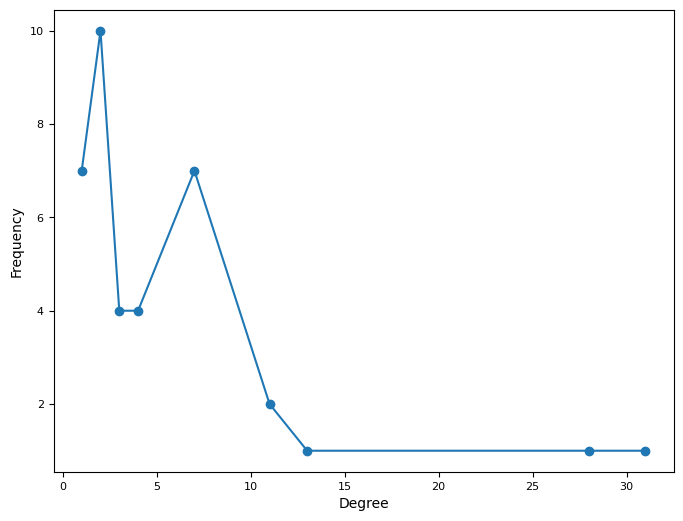

In [18]:
q_sorted = sorted(set(dict(G.degree()).values())) # create (unordered) set object (which ignores duplicate values!) of degree values from degree dictionary; sort degree values in a list
print(q_sorted)

q_dist = [list(dict(G.degree()).values()).count(q) for q in q_sorted] # obtain numbers of how often each degree value in the `q_sorted` list appears in degree dictionary; return these numbers in another list
print(q_dist)

plt.figure(figsize=(8,6)) # create a figure

plt.plot(q_sorted, q_dist, 'o', linestyle='-') # plot the values in the `q_sorted` and `q_dist` lists; set the marker to circle marker

# adjust the figure settings

plt.xlabel('Degree', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8) # set tick label font size

plt.show # display the figure

For large network graphs (much larger than this example), it may be necessary to change the scale of the figure from linear to logarithmic to visualize the right-skewedness of degree distribution. Although unnessary in this example, it is done to demonstrate the code:

<function matplotlib.pyplot.show(close=None, block=None)>

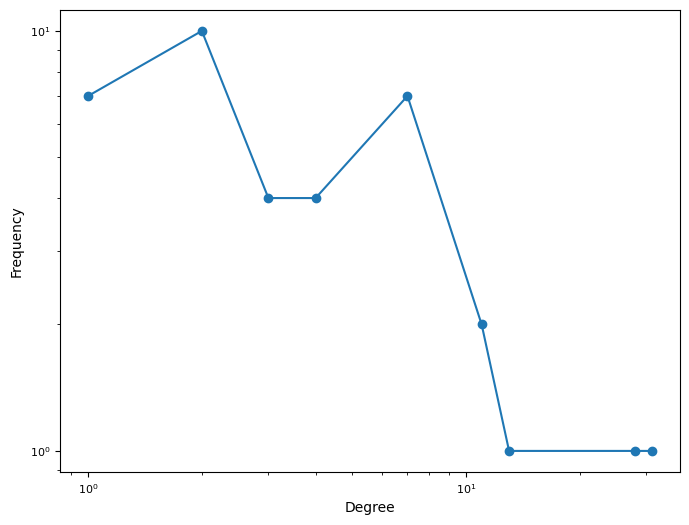

In [19]:
plt.figure(figsize=(8,6))

plt.loglog(q_sorted, q_dist, 'o', linestyle='-') # plot with logarithmic scaling on both axes

plt.xlabel('Degree', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.show

### 3.3 Path

A path is any possible way in a network by which nodes are connected: the network-distance between any two nodes.

In [20]:
# print shortest paths between two specified nodes

print(nx.shortest_path(G, 0, 1))
print(nx.shortest_path(G, 0, 31))

[0, 1]
[0, 1, 31]


In [21]:
# print lengths of shortest paths between two specified nodes

print(nx.shortest_path_length(G, 0, 1))
print(nx.shortest_path_length(G, 0, 31))

1
2


In [22]:
print(nx.average_shortest_path_length(G)) # print average shortest path length of network graph

1.93993993993994


### 3.4 Clustering

Clustering measures the number of closed triangles (ie fully interlinked groups of three nodes) in relation to the total number of triangles (ie both open and closed three-node groups). Real-world networks are typically more densely clustered than random networks.

In [23]:
G_random = nx.gnm_random_graph(len(G.nodes()), len(G.edges())) # create a random network graph object
print(nx.transitivity(G_random)) # print random clustering

print(nx.transitivity(G)) # print clustering

0.15212981744421908
0.3431372549019608


### 3.5 Centrality Measures
Centrality implies a global (macro) perspective on the network (rather than the local (micro) perspective implied by exploring the local clustering of an ego network), with an interest in identifying actors that are popular, influential, 'important', strategically positioned, etc.

#### Degree Centrality

Degree centrality indicates the degrees of nodes: the 'popularity' of actors, their neighborhood size, ie the number of observed distance-1 links to other actors.

In [24]:
dc = cl.Counter(dict(G.degree())) # create dictionary (from degree dictionary) with items ordered in relation to degree values
print(dc)
print()

# print the five nodes with the highest degree centrality

for n, d in dc.most_common(5):
    print('%03i. %s: %i' % (n, G.nodes[n]['label'], d)) # this line uses C-style formatting; zero padding (`03`) is added to node IDs

Counter({1: 31, 0: 28, 3: 13, 20: 11, 21: 11, 17: 7, 18: 7, 19: 7, 22: 7, 23: 7, 24: 7, 25: 7, 4: 4, 10: 4, 15: 4, 16: 4, 2: 3, 5: 3, 12: 3, 13: 3, 6: 2, 7: 2, 8: 2, 9: 2, 28: 2, 29: 2, 31: 2, 33: 2, 35: 2, 36: 2, 11: 1, 14: 1, 26: 1, 27: 1, 30: 1, 32: 1, 34: 1})

001. W. H. Auden: 31
000. Stella Musulin: 28
003. Chester Kallman: 13
020. Mary McCarthy: 11
021. Yefrim Etkind: 11


#### Closeness Centrality
Closeness centrality indicates how easily nodes can reach every other node in a network (even highly connected nodes can be at the margin of networks).

In [25]:
cc = cl.Counter(nx.closeness_centrality(G)) # create ordered dictionary with node IDs as keys as closeness centrality measures as values
print(cc)
print()

# print the five nodes with the highest closeness centrality

for n, c in cc.most_common(5):
    print('%03i. %s: %f' % (n, G.nodes[n]['label'], c))

Counter({1: 0.8780487804878049, 0: 0.8181818181818182, 3: 0.6, 20: 0.5806451612903226, 21: 0.5806451612903226, 17: 0.5454545454545454, 18: 0.5454545454545454, 19: 0.5454545454545454, 22: 0.5454545454545454, 23: 0.5454545454545454, 24: 0.5454545454545454, 25: 0.5454545454545454, 4: 0.5294117647058824, 10: 0.5217391304347826, 15: 0.5217391304347826, 16: 0.5217391304347826, 2: 0.5142857142857142, 5: 0.5142857142857142, 12: 0.5142857142857142, 13: 0.5142857142857142, 7: 0.5070422535211268, 8: 0.5070422535211268, 9: 0.5070422535211268, 28: 0.5070422535211268, 29: 0.5070422535211268, 31: 0.4864864864864865, 33: 0.48, 35: 0.48, 14: 0.47368421052631576, 26: 0.47368421052631576, 30: 0.47368421052631576, 32: 0.47368421052631576, 6: 0.4675324675324675, 36: 0.4675324675324675, 11: 0.45569620253164556, 34: 0.45569620253164556, 27: 0.34951456310679613})

001. W. H. Auden: 0.878049
000. Stella Musulin: 0.818182
003. Chester Kallman: 0.600000
020. Mary McCarthy: 0.580645
021. Yefrim Etkind: 0.580645


#### Betweenness centrality
Betweenness centrality indicates to what extent nodes stand in the shortest path of every pair of nodes in the network: how frequently an actor links other actors.

In [26]:
bc = cl.Counter(nx.betweenness_centrality(G, normalized=True, weight='weight')) # create ordered dictionary of node IDs and betweenness centrality measures
print(bc)
print()

# print the five nodes with the highest betweenness centrality

for n, c in bc.most_common(5):
    print('%03i. %s: %f' % (n, G.nodes[n]['label'], c))

Counter({1: 0.46929995929995943, 0: 0.3928164428164429, 3: 0.0602821869488536, 4: 0.05555555555555555, 6: 0.040211640211640205, 16: 0.0325925925925926, 23: 0.018528887338411154, 24: 0.018528887338411154, 25: 0.018528887338411154, 17: 0.012530864197530866, 18: 0.012530864197530866, 19: 0.012530864197530866, 22: 0.012530864197530866, 2: 0.010019187162044306, 13: 0.010019187162044306, 20: 0.009523809523809525, 21: 0.009523809523809525, 7: 0.004021164021164022, 8: 0.004021164021164022, 9: 0.004021164021164022, 29: 0.004021164021164022, 36: 0.0030443630443630454, 12: 0.00295366009651724, 31: 0.00295366009651724, 5: 0.0, 10: 0.0, 11: 0.0, 14: 0.0, 15: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 30: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0})

001. W. H. Auden: 0.469300
000. Stella Musulin: 0.392816
003. Chester Kallman: 0.060282
004. Elsa Musulin: 0.055556
006. Marko Musulin: 0.040212


#### Eigenvector Centrality
Eigenvector centrality indicates the extent to which nodes are well connected to other well-connected nodes: how are actors connected to other popular actors?

In [27]:
ec = cl.Counter(nx.eigenvector_centrality(G, weight='weight')) # create ordered dictionary with node IDs and Eigenvector centrality measures
print(ec)
print()

# print the five nodes with the highest eigenvector centrality

for n, e in ec.most_common(5):
    print('%03i. %s: %f' % (n, G.nodes[n]['label'], e))

Counter({1: 0.6476408526091685, 0: 0.6183178295237882, 3: 0.3263596065480568, 15: 0.22292884958328277, 10: 0.06966905654439225, 20: 0.06468536131897032, 21: 0.06468536131897032, 4: 0.06426627317279072, 28: 0.06337455991964344, 5: 0.05750090952237275, 12: 0.04447232267384522, 23: 0.03608777338969275, 24: 0.03608777338969275, 25: 0.03608777338969275, 2: 0.03203319393298243, 13: 0.03203319393298243, 16: 0.03135410828466962, 17: 0.029873224376782387, 18: 0.029873224376782387, 19: 0.029873224376782387, 22: 0.029873224376782383, 7: 0.02546771558939032, 8: 0.02546771558939032, 9: 0.02546771558939032, 29: 0.02546771558939032, 31: 0.01959406519211964, 36: 0.019004607084454894, 6: 0.013732002194229091, 33: 0.013296074038809707, 35: 0.013296074038809707, 14: 0.013028586848527531, 26: 0.013028586848527531, 30: 0.013028586848527531, 32: 0.013028586848527531, 11: 0.012439128740862788, 34: 0.012439128740862788, 27: 0.001292873453366304})

001. W. H. Auden: 0.647641
000. Stella Musulin: 0.618318
003. 

### 3.6 Community Structure
Communities are groups of nodes that are more densely connected among each other than with other (groups of) nodes. This implies a meso perspective, with communities being meso-scale structures. In the following, the Louvain algorithm is used to identify communities.

In [28]:
comm_dict = community_louvain.best_partition(G) # create dictionary with nodes as keys and numeric community IDs as values
print(comm_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 0, 27: 1, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 2, 34: 0, 35: 2, 36: 0}


In [29]:
print(list(comm_dict.values())) # print list of community IDs from above dictionary

comm_set = set(list(comm_dict.values())) # create set object with singular instances of each numeric community ID
print(comm_set)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0]
{0, 1, 2, 3}


In [30]:
comm_org = {comm:[] for comm in list(comm_set)} # create list from above comm_set set; from list, create dictionary with numeric community IDs as keys and empty lists as values
print(comm_org)
print()

# append nodes (ie the keys in the `comm_dict` dictionary) to values (lists) in `comm_org` dictionary
# this is done by means of identifying values of the `comm_dict` dictionary as keys of `comm_org` dictionary and appending the `label` of the corresponding node to the list that is the value of the `comm_org` dictionary

for node, comm in comm_dict.items():
    comm_org[comm].append(G.nodes[node]['label']) # `comm_org[comm].append(node)` would return node IDs instead of names
    
print(comm_org)

{0: [], 1: [], 2: [], 3: []}

{0: ['Stella Musulin', 'W. H. Auden', 'Emma Eiermann', 'Chester Kallman', 'Christiane Zimmer', 'Father Lustkandl', 'Maria Seitz', 'Josef Seitz', 'Gesellschaft fÃ¼r Literatur', 'Thomas Bernhard', 'Friedrich Heer', 'Austrian student at the College of Technology', "Some of Auden's translators", 'Austro-British Council', 'students of Eng. Lit.', 'Josefa Strobl', 'St. PÃ¶lten hospital', 'Wild grocers', "Auden's callboy Hugie", 'Jean Boras', 'Guests including journalists', 'Janko Musulin', 'the one-whose-name-we-never-mention'], 1: ['Elsa Musulin', 'Marko Musulin', "Stella Musulin's brother-in-law"], 2: ['Governor of Lower Austria', 'listeners at Neulengbach speech'], 3: ['dons, writers and critics from eastern and western Europe', 'journalists and a few public figures', 'Francis Bondy', 'Mary McCarthy', 'Yefrim Etkind', 'Marcel Reich-Ranicki', 'Philip Toynbee', 'Sally Toynbee', 'Hilde Spiel']}


## 4 DataFrame Visualization

In [31]:
# plot pandas DataFrame

df_plot = pd.DataFrame({'label': nx.get_node_attributes(G, "label"), 'degreeCentrality': dc, 'closenessCentrality': cc, 'betweennessCentrality': bc, 'eigenvectorCentrality': ec, 'community': comm_dict.values(),}, index=list(G.nodes))

# create ColumnDataSource object for further use with Bokeh

# source = ColumnDataSource(df_plot)

# display DataFrame

df_plot



,label,degreeCentrality,closenessCentrality,betweennessCentrality,eigenvectorCentrality,community
0,Stella Musulin,28,0.818182,0.392816,0.618318,0
1,W. H. Auden,31,0.878049,0.469300,0.647641,0
2,Emma Eiermann,3,0.514286,0.010019,0.032033,0
3,Chester Kallman,13,0.600000,0.060282,0.326360,0
4,Elsa Musulin,4,0.529412,0.055556,0.064266,1
5,Christiane Zimmer,3,0.514286,0.000000,0.057501,0
6,Marko Musulin,2,0.467532,0.040212,0.013732,1
7,Father Lustkandl,2,0.507042,0.004021,0.025468,0
8,Maria Seitz,2,0.507042,0.004021,0.025468,0
9,Josef Seitz,2,0.507042,0.004021,0.025468,0


## 5 Network Visualization

### 5.1 Simple Network Visualization

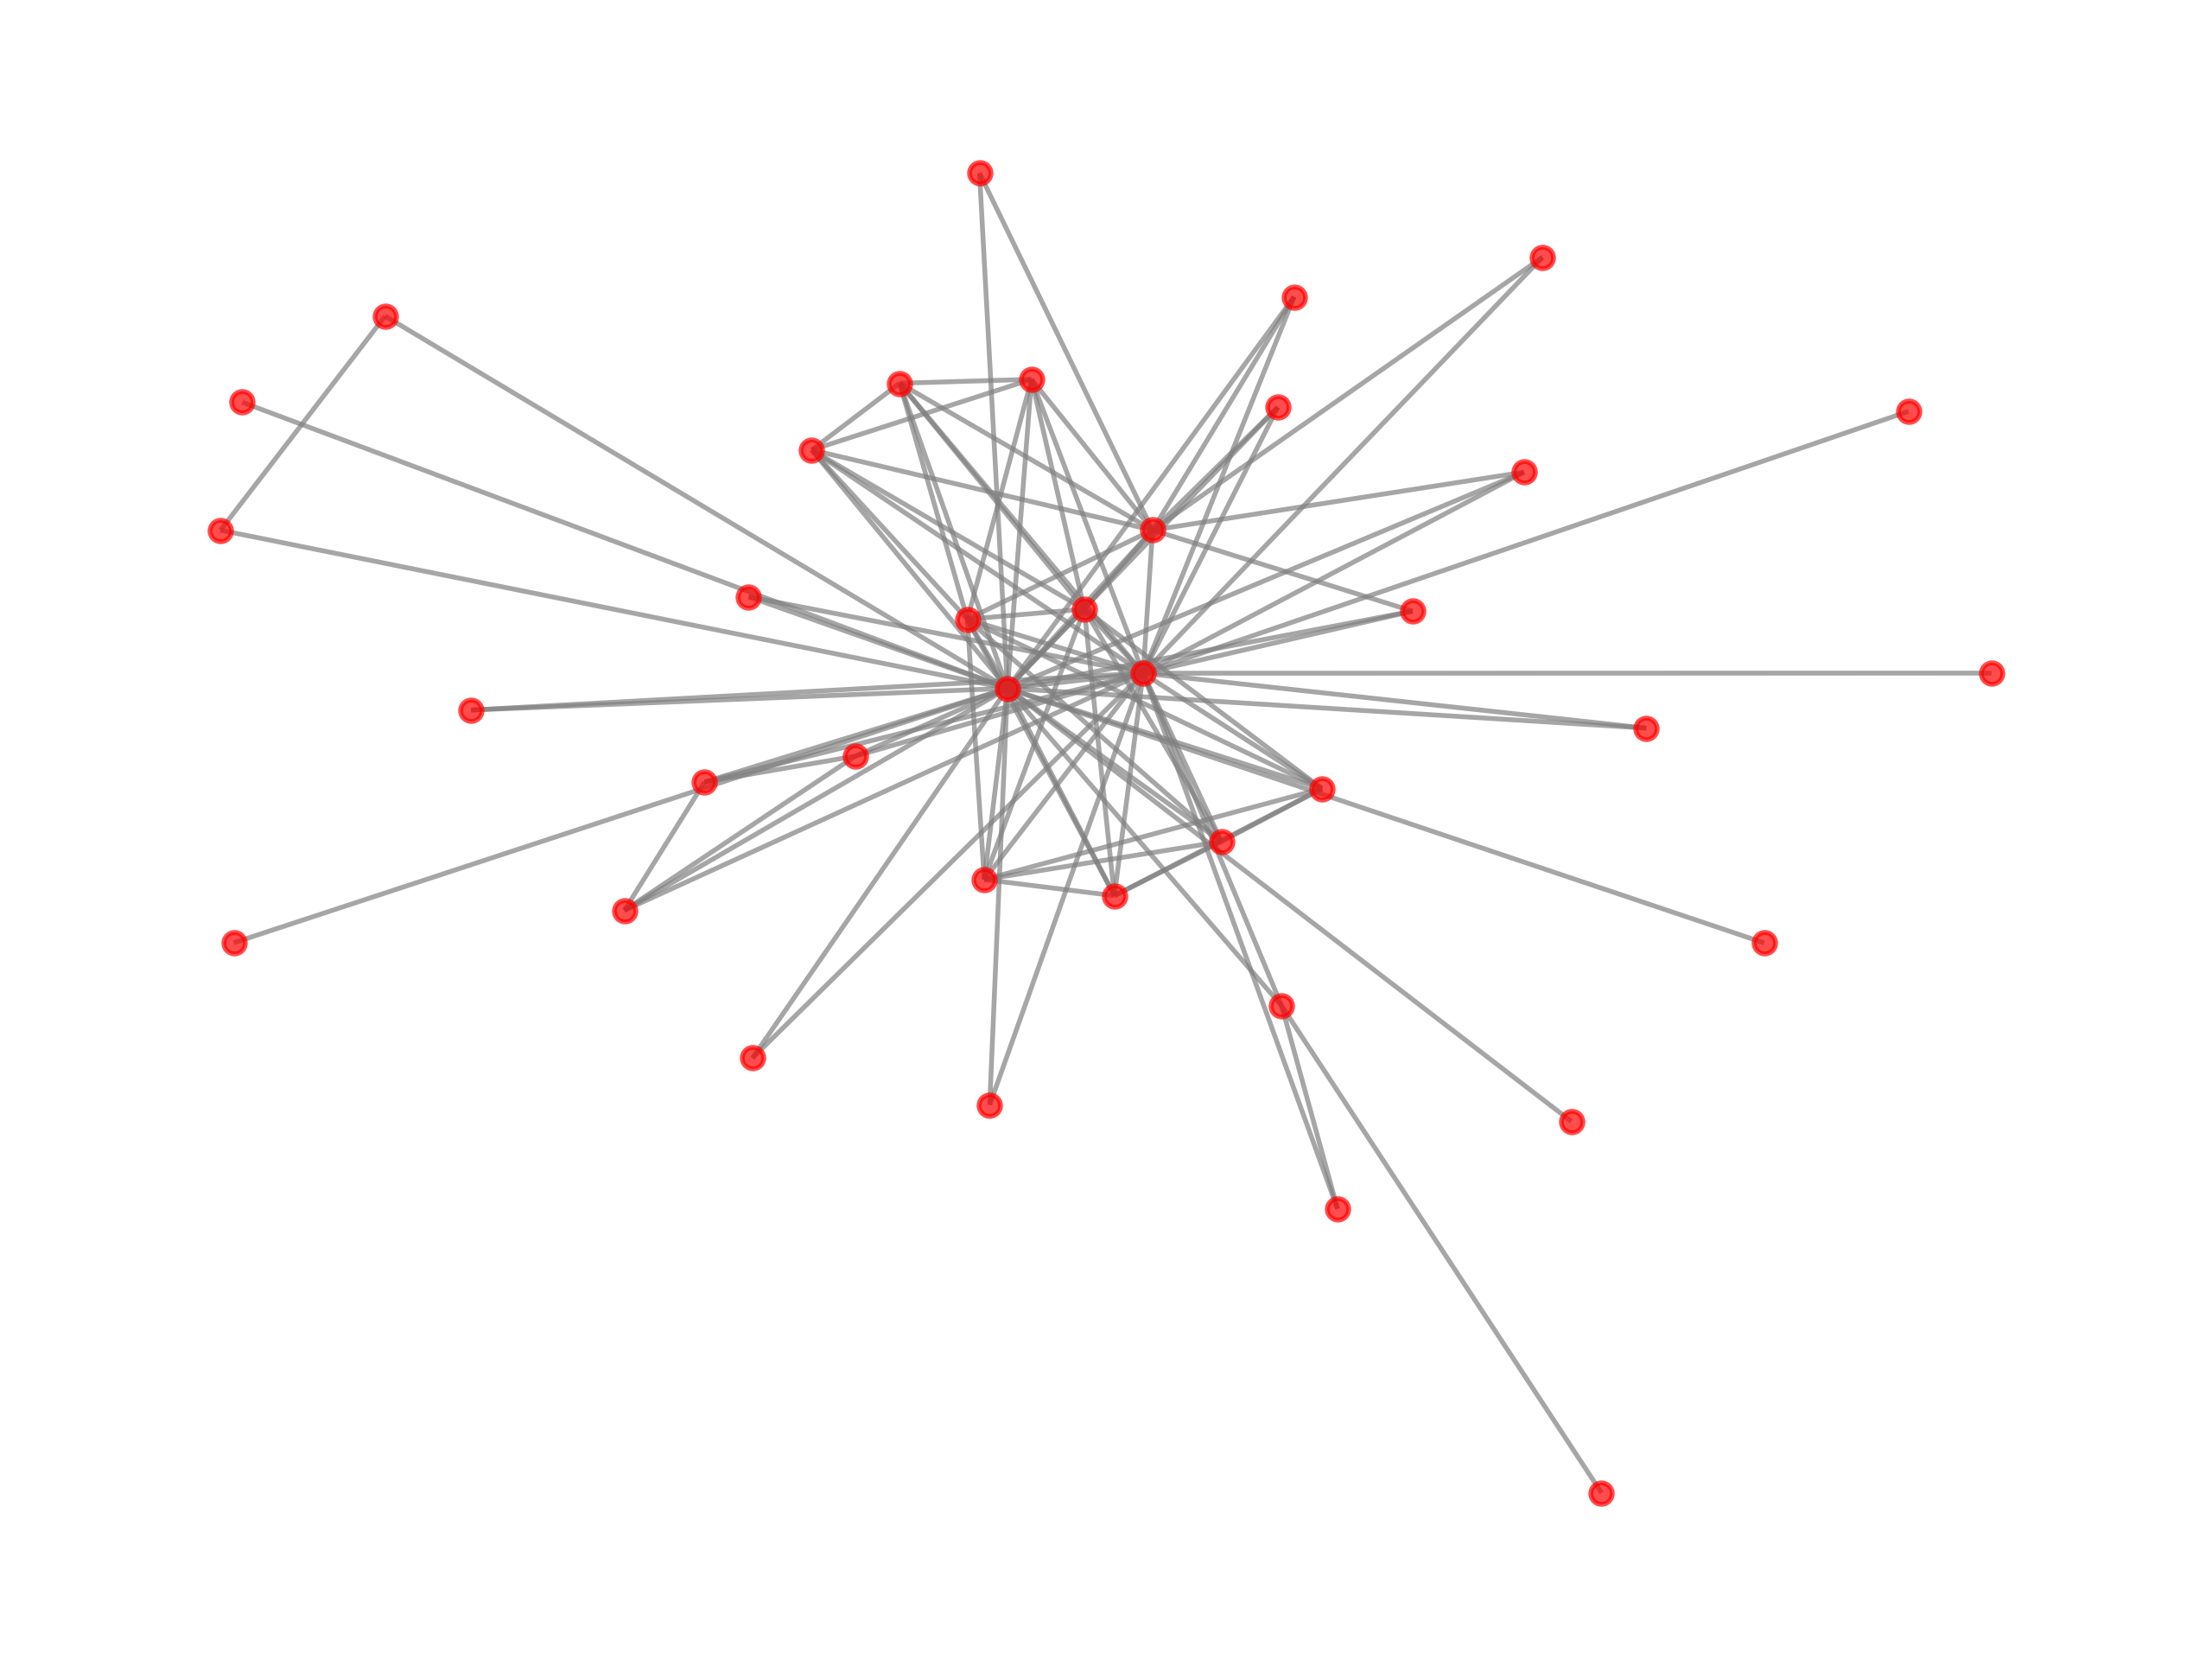

In [32]:
plt.figure(1, figsize=(8,6), dpi=400)

pos = nx.spring_layout(G) # position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx(G, pos=pos, with_labels=False, node_size=20, node_color='r', alpha=0.7, edge_color='gray') # draw network; `alpha` controls node and edge transparency

plt.axis('off') # turn off axis lines and labels

plt.show()

### 5.2 More Advanced Network Visualization

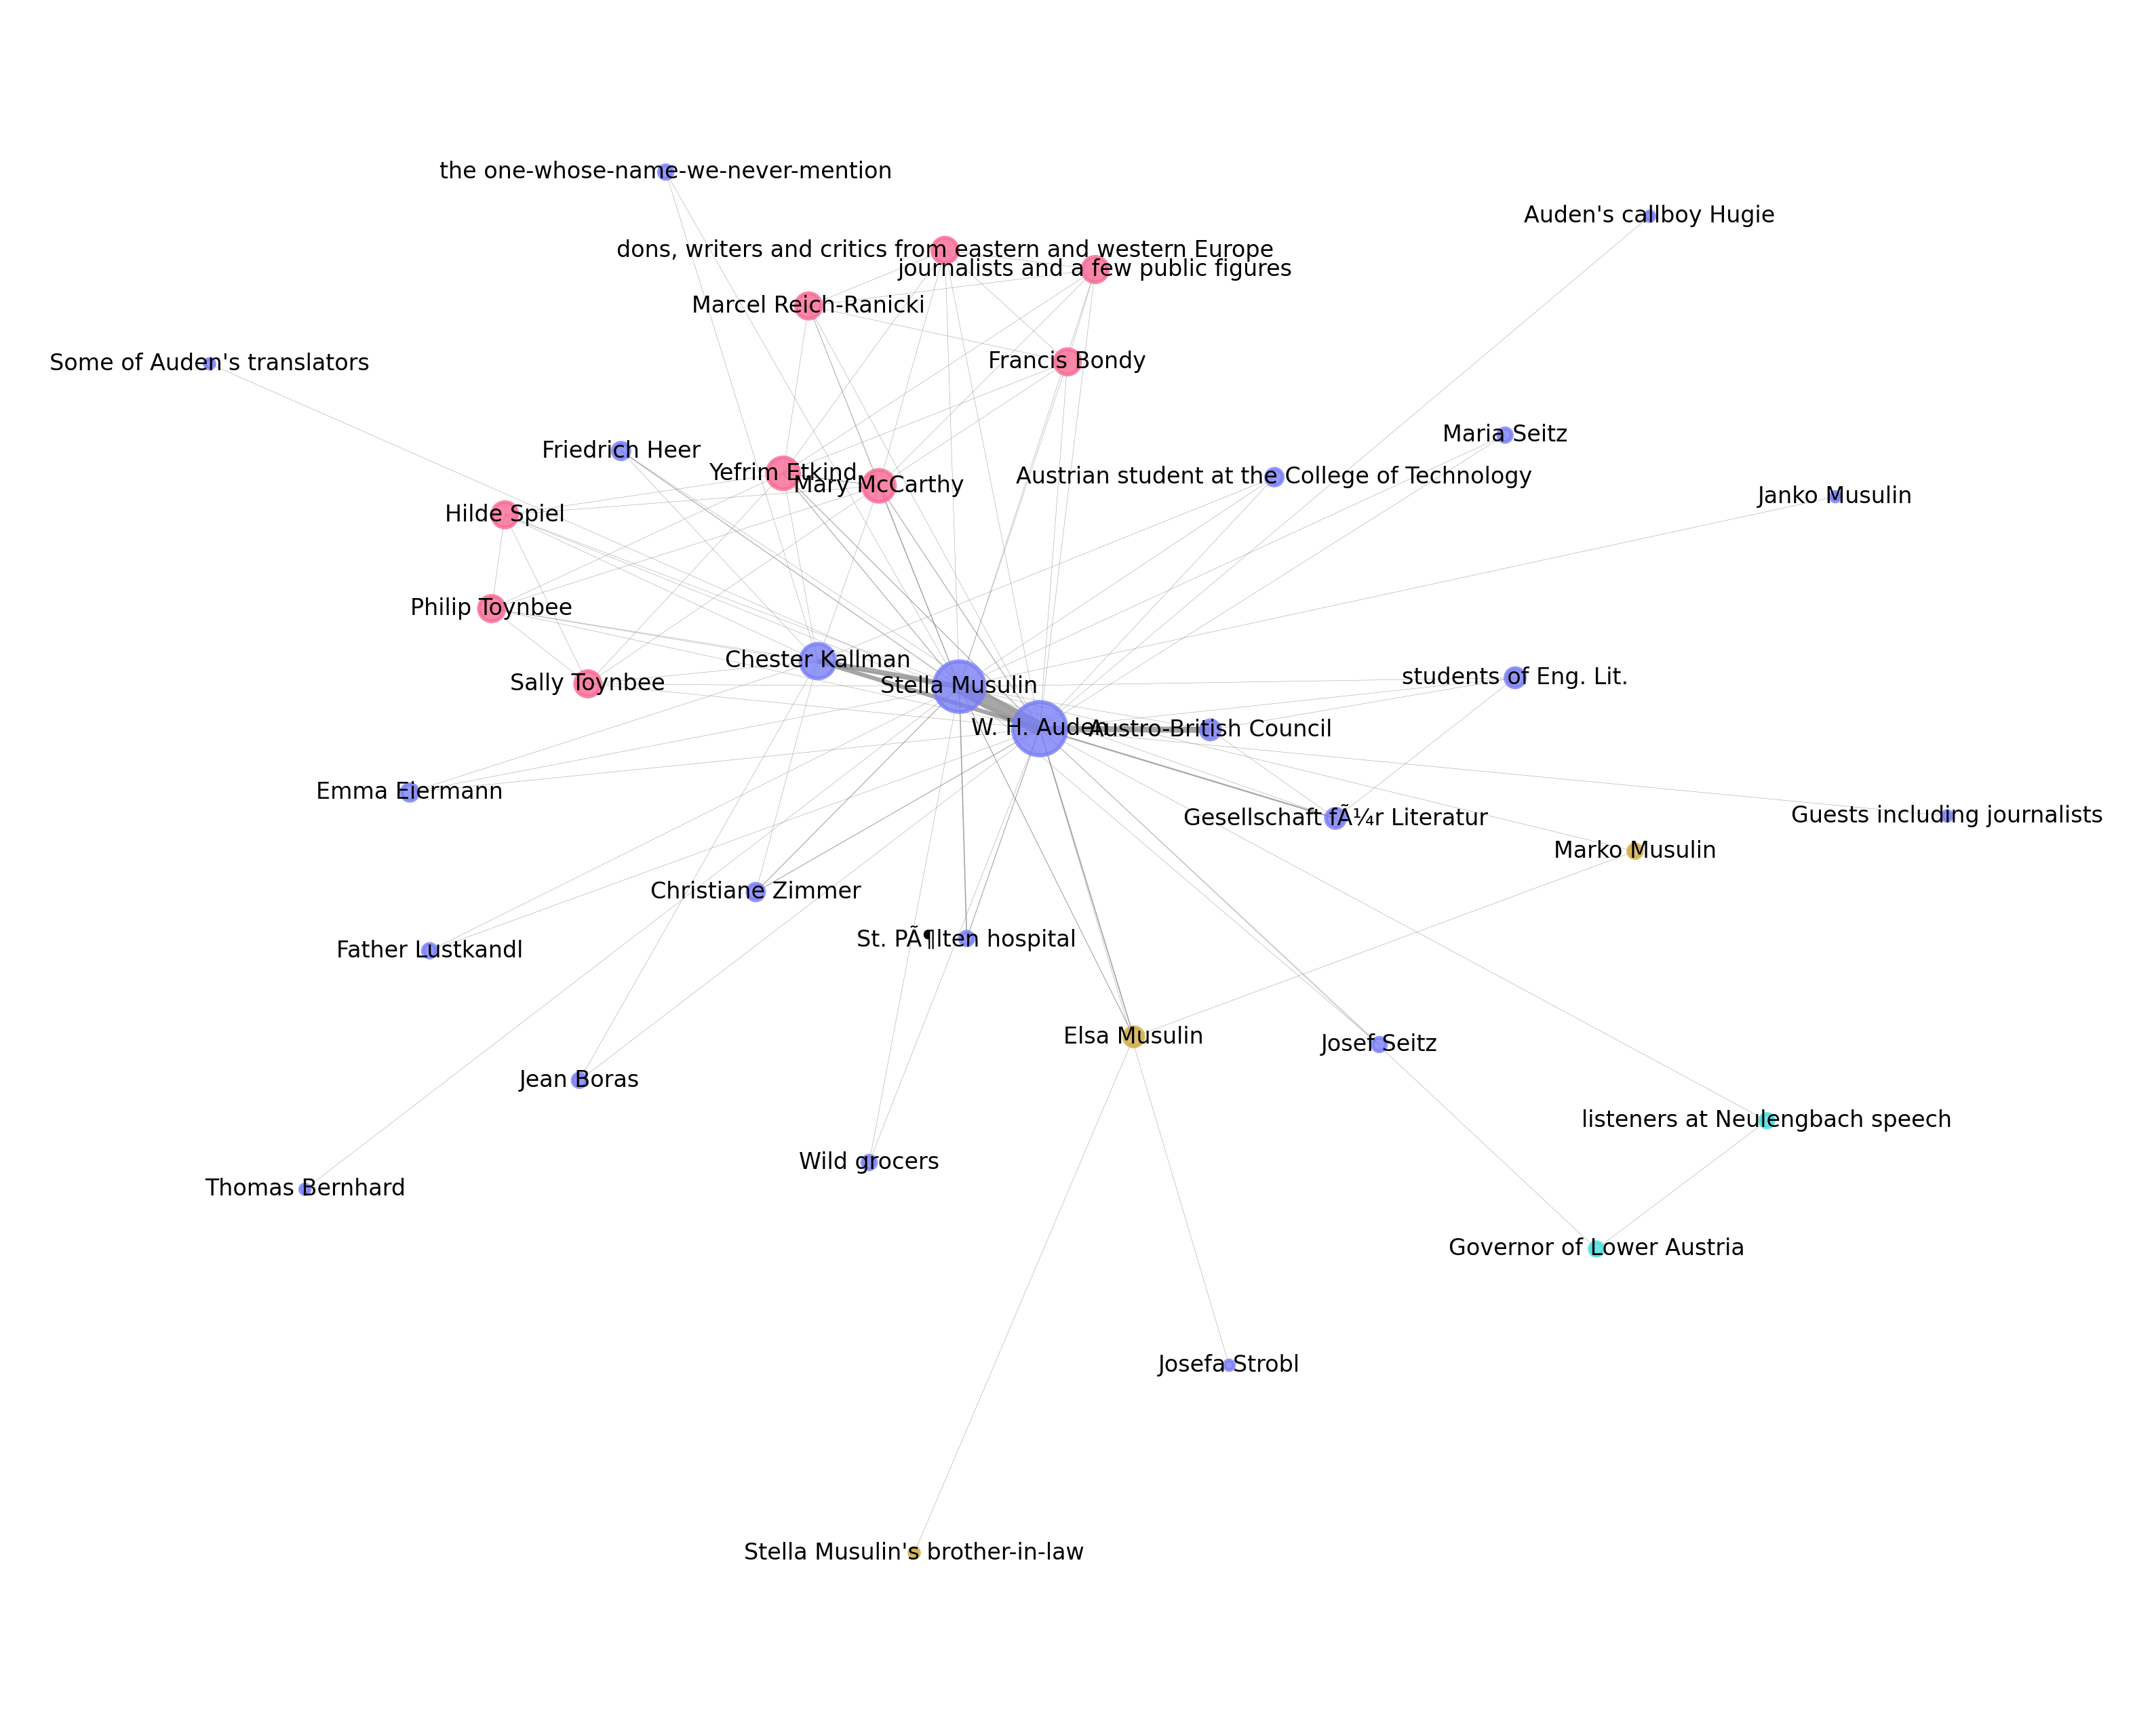

In [34]:
plt.figure(1, figsize=(10,8), dpi=400)

pos = nx.spring_layout(G, iterations=50, weight='weight', scale=1.0, k=0.75, seed=12) # increase `k` to move nodes further apart
# print(pos)

colors = {0:'#797EF6', 1:'#D2AC47', 2:'#4ADEDE', 3:'#f96995', 4:'#ff7f00', 5:'#a6cee3', 6:'#a65628'} # create dictionary of colors to be used for depicting communities

labelling = {u: G.nodes[u]['label'] for u,l in pos.items()} # create dictionary with node IDs (taken here from `pos` dictionary) as keys and node labels as values; add `if u in pos if bc[u]>0.095` for a more selective labelling based on betweenness centrality measures
# print(labelling)

# draw nodes, edges, and labels

nx.draw_networkx_nodes(G, pos=pos, node_size=[max(G.degree(g)*6.5,5) for g in G], alpha=0.8, node_color=[colors[c] for u,c in comm_dict.items()]) # draw nodes; alternatively, use dataset `colour` values through `node_color=[G.nodes[node]['color'] for node in G]`
weights = [(G[u][v]['weight']/10) for u,v in G.edges()] # create list with fractions of the edges' `weight` values as items
nx.draw_networkx_edges(G, pos=pos, width=weights, alpha=0.7, edge_color='gray') # draw edges
nx.draw_networkx_labels(G, pos=pos, labels=labelling, font_size=6) # format and draw labels

plt.axis('off') 

# plt.savefig('example_network.png', format='png', dpi=400) # save figure in png format

plt.show()